<a href="https://colab.research.google.com/github/celelunar/Back-Pain-ANN-Prediction/blob/main/ANN%20Predictive%20Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Diva Nabila Henryka
<br> NIM: 2501975620


---

#**MID TEST - NUMBER 01**
###**Prediction using ANN**

Link video: https://drive.google.com/file/d/1Si0mD7-WcHTR4iGgq7wTWADqoDDsDAKP/view?usp=sharing

In [ ]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import io
from google.colab import drive

# Dataset

To use the dataset, I'll be utilizing Google Drive to store the .csv file and then importing it to this Google Colab by mounting my whole Google Drive to access the path to file in here.

References:
https://medium.com/@simonprdhm/2-ways-to-upload-csv-files-to-google-colab-4d29ffa9db85

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read dataset
path = "/content/drive/MyDrive/dataset_spine.csv"
ds = pd.read_csv(path)
ds.head()

,Unnamed: 0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


## a. Exploratory Data Analysis (EDA)


Reference:
1. https://medium.com/@ugursavci/complete-exploratory-data-analysis-using-python-9f685d67d1e4
2. https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/

### Dataset Understanding
---
The first step in EDA is to ensure that we're already familiar with the dataset that will be used. To do that we can use .info() to show the attributes of the whole dataset, .columns() to show the columns names, and .describe() to give a numerical summary of the dataset.

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  310 non-null    int64  
 1   Col1        310 non-null    float64
 2   Col2        310 non-null    float64
 3   Col3        310 non-null    float64
 4   Col4        310 non-null    float64
 5   Col5        310 non-null    float64
 6   Col6        310 non-null    float64
 7   Col7        310 non-null    float64
 8   Col8        310 non-null    float64
 9   Col9        310 non-null    float64
 10  Col10       310 non-null    float64
 11  Col11       310 non-null    float64
 12  Col12       310 non-null    float64
 13  Class_att   310 non-null    object 
dtypes: float64(12), int64(1), object(1)
memory usage: 34.0+ KB


In [ ]:
ds.columns

Index(['Unnamed: 0', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7',
       'Col8', 'Col9', 'Col10', 'Col11', 'Col12', 'Class_att'],
      dtype='object')

In [ ]:
ds.describe()

,Unnamed: 0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,154.500000,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,89.633513,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,0.000000,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,77.250000,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,154.500000,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,231.750000,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,309.000000,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [ ]:
ds.describe(include = object)

,Class_att
count,310
unique,2
top,Abnormal
freq,210


### Check data structure
---
This step is actually to ensure the data is in string form. But as can be seen from the step before, all indepent variables are numerical, thus we may skip this step.

However, I will be using this step to check the value of our response variable and change it into binary number (0, 1) if it has not in that form.

In [ ]:
ds['Class_att'].unique()

array(['Abnormal', 'Normal'], dtype=object)

It can be seen above that our response variable is actually in object format, so I'll change its form to binary numbers.

In [ ]:
ds['Class_att'].replace(['Abnormal', 'Normal'], [0, 1], inplace = True)

### Check and handling missing values
---
This step is to check if there are any missing values in the dataset and to handle it if there are any.

In [ ]:
total = ds.isnull().sum().sort_values(ascending=False)
percent = (ds.isnull().sum()/ds.isnull().count()).sort_values(ascending=False)
missingData = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missingData.head(15)

,Total,Percent
Unnamed: 0,0,0.0
Col1,0,0.0
Col2,0,0.0
Col3,0,0.0
Col4,0,0.0
Col5,0,0.0
Col6,0,0.0
Col7,0,0.0
Col8,0,0.0
Col9,0,0.0


In [ ]:
ds.isna().sum()

Unnamed: 0    0
Col1          0
Col2          0
Col3          0
Col4          0
Col5          0
Col6          0
Col7          0
Col8          0
Col9          0
Col10         0
Col11         0
Col12         0
Class_att     0
dtype: int64

It can be seen above that our dataset does not have any missing values.

### Check and handling duplicates
---

This step is to check and handle if there are any duplicated data inside the dataset and handle it if there are any.

In [ ]:
ds.duplicated().sum()

0

According to the output above that we do not have any duplicated data.

### Check data ratio
---

If the ratio of the count between 0 (Abnormal) and 1 (Normal) is more than 1:5, then dataset is imbalanced. Otherwise, the data still can be called as balanced dataset.

(array([0, 1]), [Text(0, 0, 'Abnormal'), Text(1, 0, 'Normal')])

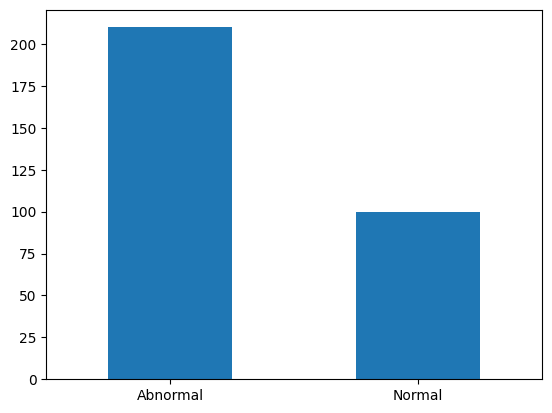

In [ ]:
ds['Class_att'].value_counts().plot(kind="bar")
plt.xticks([0, 1], ['Abnormal', 'Normal'])
plt.xticks(rotation=0)

In [ ]:
print("Abnormal case: ")
ds[ds['Class_att'] == 0]['Class_att'].count()

Abnormal case: 


210

In [ ]:
print("Normal case: ")
ds[ds['Class_att'] == 1]['Class_att'].count()

Normal case: 


100

The output of the bar graph and count above shows that the sum of 'Abnormal' is 210 and 'Normal' is 100. The ratio between the two is 1:2.1, so this dataset can still be considered as balanced.

### Check the outliers
---
Boxplots can be used to identify whether there are outliers or not, because if there are outliers, we can find where they are located, in which row, and most likely they will be removed to make the prediction results better.

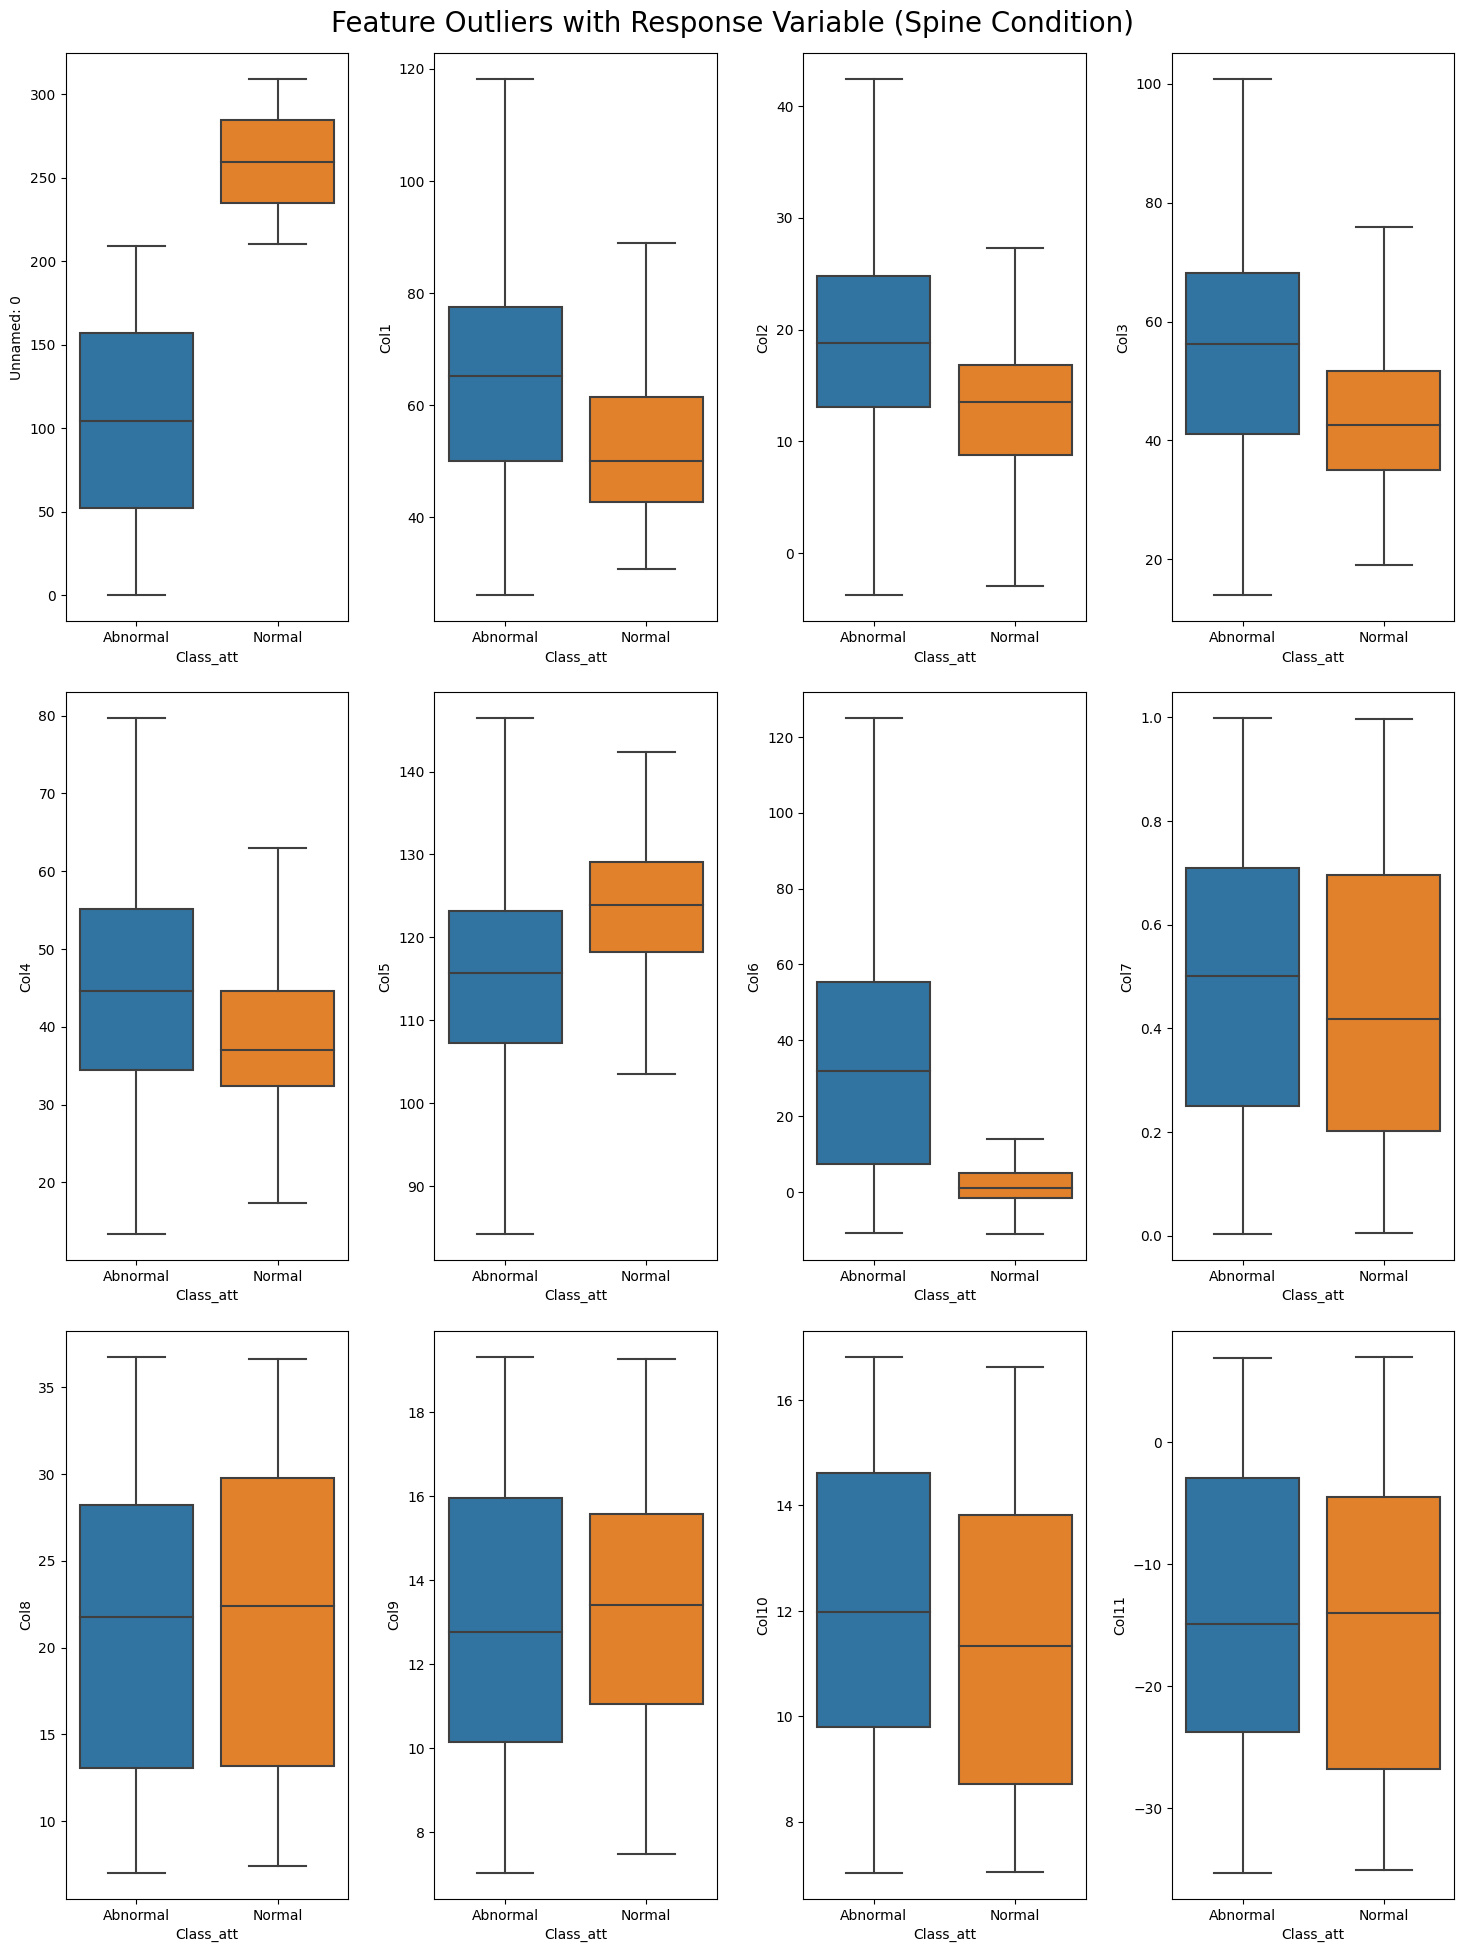

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 20))

for feature, subplot in zip(ds, ax.flatten()):
    if feature == 'Class_att':
        continue
    sns.boxplot(x = ds['Class_att'], y = ds[feature], showfliers = False, ax = subplot)
    subplot.set_xticks([0, 1], ['Abnormal', 'Normal'])

plt.suptitle('Feature Outliers with Response Variable (Spine Condition)', fontsize = 20)
plt.tight_layout(pad = 2)
plt.show()

The boxplot above shows that there are no outliers in our dataset.

### Check correlations between variables
---

<Axes: >

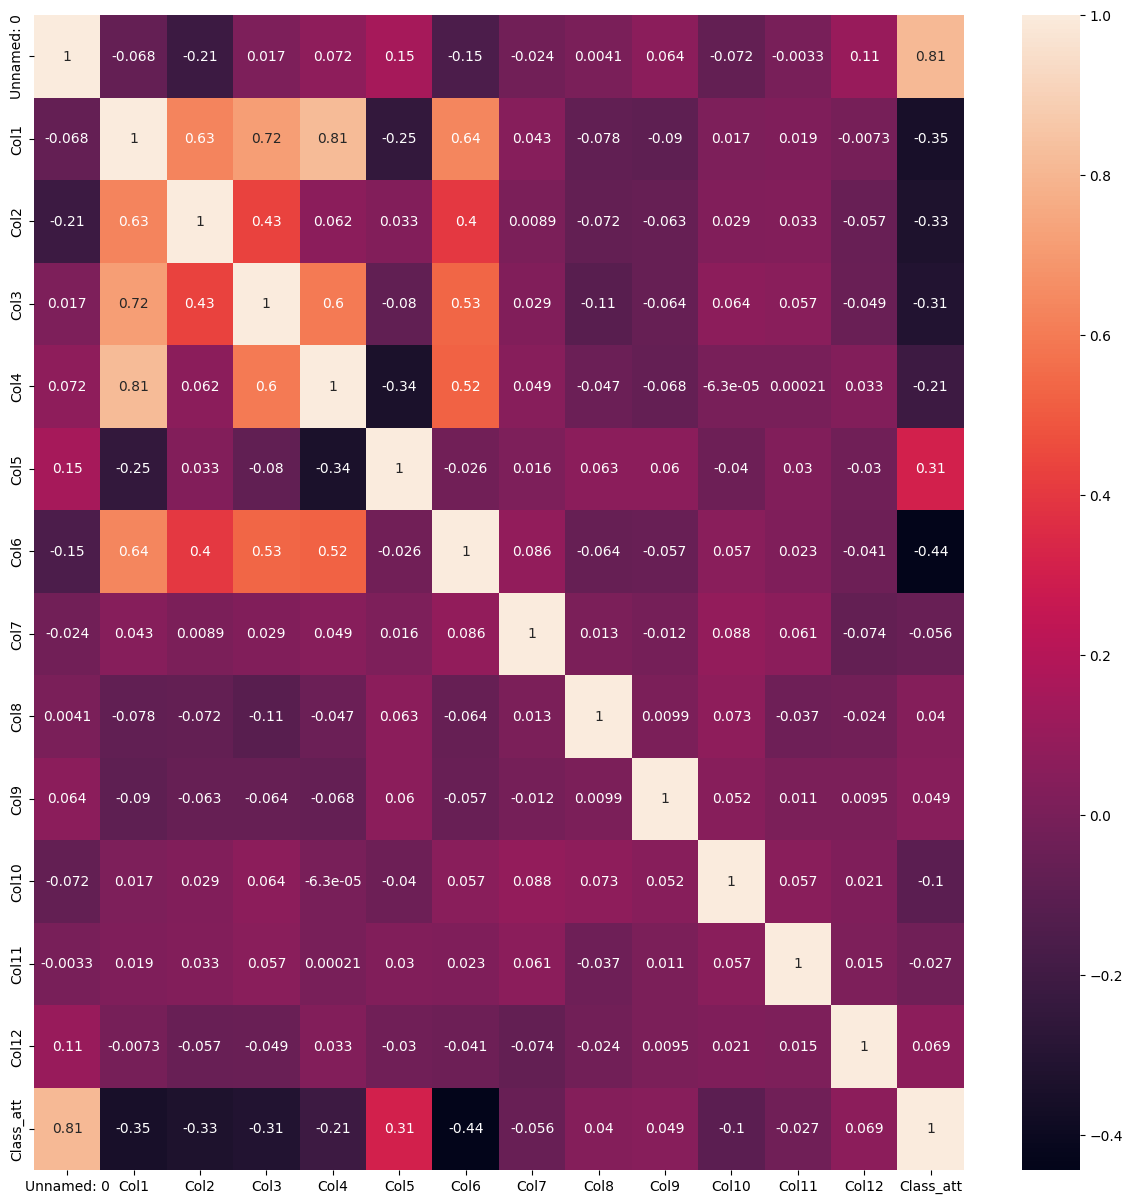

In [ ]:
corr = ds.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True)

# Model and Architecture

### b. Data splitting
---
The given stipulations ask us to split the data into 80% training data, 10% testing data, and 10% validation data.

I'll be using random state 88 for splitting the training data and 66 for splitting the testing and validation data.

Reference: https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(ds.iloc[:,:-1], ds['Class_att'], test_size = 0.2, random_state = 88)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 66)

### c. Architecture
---

References:
1. https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
2. https://keras.io/api/callbacks/early_stopping/
3. https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
4. https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

In [ ]:
# Early stopping
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=3
                             )
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=1,
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=2,
                              min_lr=0.00001,
                              factor=0.2
                             )
callbacks = [checkpointer, earlystopping, reduce_lr]

In [ ]:
model = Sequential()

# Input layer
model.add(Dense(units = 2, activation = 'sigmoid', input_shape = (x_train.shape[1], )))

# Hidden layer
model.add(Dense(units = 512, activation = 'sigmoid'))
model.add(Dense(units = 256, activation = 'sigmoid'))

# Output layer + final hidden layer
model.add(Dense(units = 128, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ["accuracy"]
)

In [ ]:
hist = model.fit(x_train, y_train,
                 epochs = 50,
                 batch_size = 32,
                 validation_data = (x_val, y_val),
                 callbacks = callbacks)

Epoch 1/50
1/8 [==>...........................] - ETA: 3s - loss: 5.1353 - accuracy: 0.0000e+00
Epoch 1: val_loss did not improve from 0.11484
8/8 [==============================] - 1s 33ms/step - loss: 1.8773 - accuracy: 0.5766 - val_loss: 0.8069 - val_accuracy: 0.6452 - lr: 0.0010
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 0.8016 - accuracy: 0.6562
Epoch 2: val_loss did not improve from 0.11484
8/8 [==============================] - 0s 8ms/step - loss: 0.7229 - accuracy: 0.6734 - val_loss: 0.7058 - val_accuracy: 0.6452 - lr: 0.0010
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 0.6516 - accuracy: 0.7812
Epoch 3: val_loss did not improve from 0.11484
8/8 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.6734 - val_loss: 0.6979 - val_accuracy: 0.6452 - lr: 0.0010
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 0.6890 - accuracy: 0.7188
Epoch 4: val_loss did not improve from 0.11484
8/8 [==============

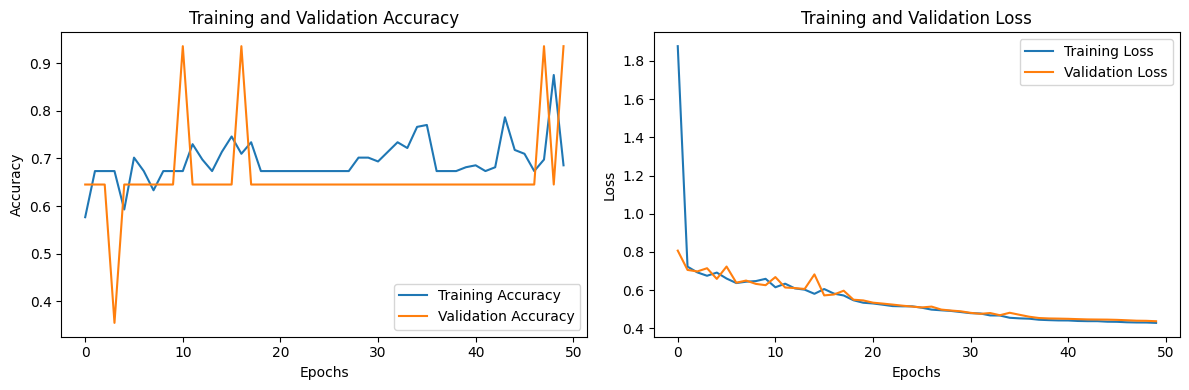

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 31ms/step - loss: 0.4493 - accuracy: 0.8710
Test Loss: 44.93%
Test Accuracy: 87.10%


The output above shows that the model is actually a good fit according to the Training vs. Validation Loss graph. Although, the Training vs. Validation Accuracy graph shows that the accuracy of the validation dataset has multiple significant increase and decreases and the model evaluation shows that the test loss is around 45%, thus we can actually provide a better architecture.

# d. Architecture Modification

For the architecture modification, I'll be using the references down below to create the new architectures. The architectures will have different units, activation, and optimizer functions than the benchmark following the architecture on these references, but I will also be checking on the functions of each modification made to the architecture by reading the mentioned references.

[Architecture] References:
1. https://www.pluralsight.com/guides/classification-keras
2. https://medium.com/@reddyyashu20/ann-python-code-in-keras-and-pytorch-d98841639ba0
3. https://www.section.io/engineering-education/build-ann-with-keras/
4. https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6
5. https://github.com/A-Jatin/Churn-Prediction/blob/master/ANN.ipynb
6. https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
7. https://towardsdatascience.com/optimizing-neural-networks-where-to-start-5a2ed38c8345
8. https://medium.com/swlh/genetic-algorithm-in-artificial-neural-network-5f5b9c9467d0
9. https://www.researchgate.net/publication/355492402_A_Supervised_Approach_to_Credit_Card_Fraud_Detection_Using_an_Artificial_Neural_Network
10. https://pub.towardsai.net/house-price-predictions-using-keras-3c6accee8a09

[Reason] References:
1. https://www.digitalocean.com/community/tutorials/how-to-build-a-deep-learning-model-to-predict-employee-retention-using-keras-and-tensorflow (dropout)
2. https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/ (optimizers)
3. https://www.educative.io/answers/what-are-the-different-activation-functions-in-keras (activation)
4. https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/ (batch normalization)

### First Modification
---

In [ ]:
# Architecture
mod1 = Sequential()
mod1.add(Dense(units = 500, activation='relu', input_shape = (x_train.shape[1], )))
mod1.add(Dense(units = 100, activation='relu'))
mod1.add(Dense(units = 50, activation='relu'))
mod1.add(Dense(units = 2, activation='softmax'))

# Compile
mod1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training
hist1 = mod1.fit(x_train, y_train,
                 epochs = 50,
                 batch_size = 32,
                 validation_data = (x_val, y_val),
                 callbacks = callbacks)

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 4.4934 - accuracy: 0.7009
Epoch 1: val_loss improved from 0.00990 to 0.00162, saving model to model.h5
8/8 [==============================] - 2s 77ms/step - loss: 4.1469 - accuracy: 0.7137 - val_loss: 0.0016 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 0.5914 - accuracy: 0.9312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - ETA: 0s - loss: 0.4354 - accuracy: 0.9435
Epoch 2: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 27ms/step - loss: 0.4354 - accuracy: 0.9435 - val_loss: 0.0941 - val_accuracy: 0.9677 - lr: 0.0010
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 0.1398 - accuracy: 0.9677
Epoch 3: val_loss did not improve from 0.00162

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
8/8 [==============================] - 0s 26ms/step - loss: 0.1398 - accuracy: 0.9677 - val_loss: 0.3131 - val_accuracy: 0.9677 - lr: 0.0010
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 0.3152 - accuracy: 0.9750
Epoch 4: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 23ms/step - loss: 0.2763 - accuracy: 0.9758 - val_loss: 0.1583 - val_accuracy: 0.9677 - lr: 2.0000e-04
Epoch 4: early stopping


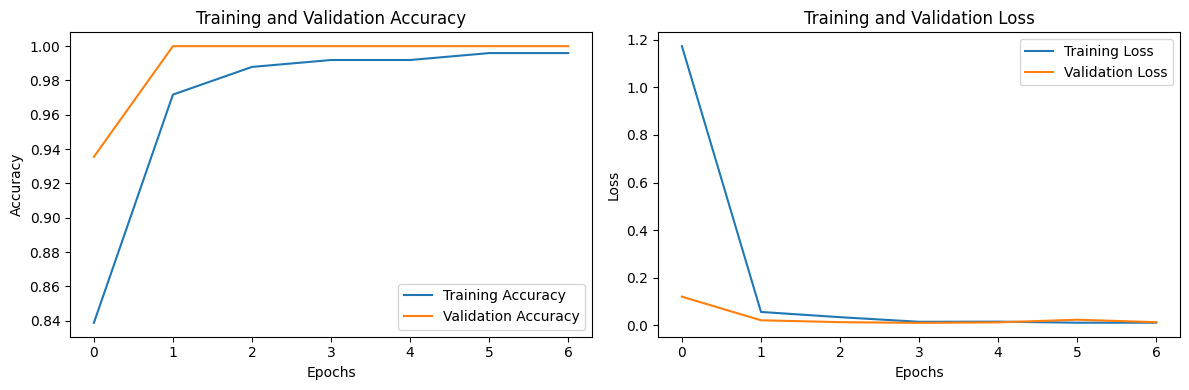

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist1.history['accuracy'], label='Training Accuracy')
plt.plot(hist1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist1.history['loss'], label='Training Loss')
plt.plot(hist1.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss1, test_accuracy1 = mod1.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss1 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy1 * 100:.2f}%")

1/1 [==============================] - 0s 31ms/step - loss: 0.0530 - accuracy: 0.9355
Test Loss: 5.30%
Test Accuracy: 93.55%


### Second modification
---

In [ ]:
mod2 = Sequential()
mod2.add(Dense(64, activation='relu', input_shape = (x_train.shape[1], )))
mod2.add(Dense(10, activation='softmax'))

mod2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist2 = mod2.fit(x_train, y_train,
                 epochs = 50,
                 batch_size = 32,
                 validation_data = (x_val, y_val),
                 callbacks = callbacks)

Epoch 1/50
1/8 [==>...........................] - ETA: 2s - loss: 64.1774 - accuracy: 0.0000e+00
Epoch 1: val_loss did not improve from 0.00990
8/8 [==============================] - 1s 30ms/step - loss: 35.1284 - accuracy: 0.0605 - val_loss: 15.1000 - val_accuracy: 0.5161 - lr: 0.0010
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 11.4020 - accuracy: 0.4688
Epoch 2: val_loss did not improve from 0.00990
8/8 [==============================] - 0s 6ms/step - loss: 6.6318 - accuracy: 0.6048 - val_loss: 3.1408 - val_accuracy: 0.6774 - lr: 0.0010
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 2.0657 - accuracy: 0.7500
Epoch 3: val_loss did not improve from 0.00990
8/8 [==============================] - 0s 7ms/step - loss: 1.4476 - accuracy: 0.7903 - val_loss: 1.6915 - val_accuracy: 0.7097 - lr: 0.0010
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 0.5897 - accuracy: 0.8125
Epoch 4: val_loss did not improve from 0.00990
8/8 [==========

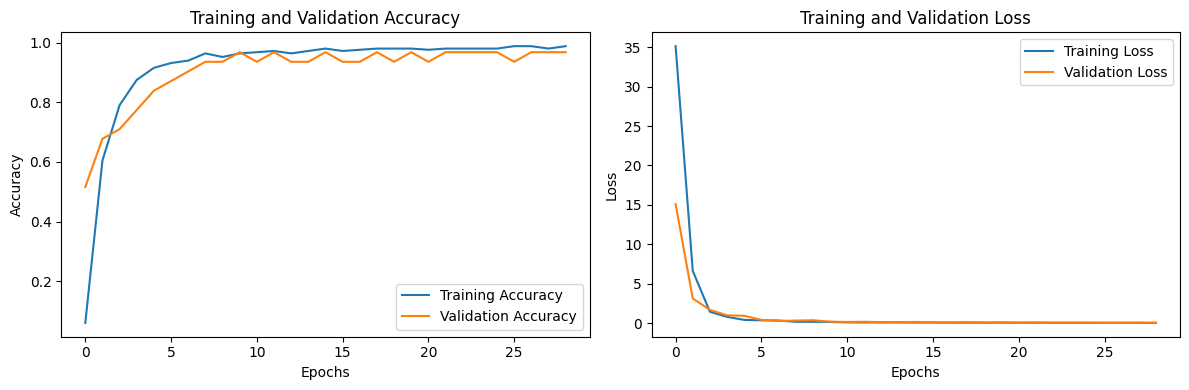

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist2.history['accuracy'], label='Training Accuracy')
plt.plot(hist2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist2.history['loss'], label='Training Loss')
plt.plot(hist2.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss2, test_accuracy2 = mod2.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss2 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy2 * 100:.2f}%")

1/1 [==============================] - 0s 49ms/step - loss: 0.0992 - accuracy: 0.9677
Test Loss: 9.92%
Test Accuracy: 96.77%


### Third Modification
---

In [ ]:
mod3 = Sequential()
mod3.add(Dense(12, activation='relu', input_shape = (x_train.shape[1], )))
mod3.add(Dense(8, activation='relu'))
mod3.add(Dense(2, activation='sigmoid'))

mod3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist3 = mod3.fit(x_train, y_train,
                 epochs = 50,
                 batch_size = 32,
                 validation_data = (x_val, y_val),
                 callbacks = callbacks)

Epoch 1/50
1/8 [==>...........................] - ETA: 6s - loss: 30.9748 - accuracy: 0.3438
Epoch 1: val_loss did not improve from 0.00990
8/8 [==============================] - 1s 28ms/step - loss: 26.4804 - accuracy: 0.3226 - val_loss: 25.6209 - val_accuracy: 0.2258 - lr: 0.0010
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 19.7719 - accuracy: 0.4375
Epoch 2: val_loss did not improve from 0.00990
8/8 [==============================] - 0s 6ms/step - loss: 21.6547 - accuracy: 0.2702 - val_loss: 20.6370 - val_accuracy: 0.2258 - lr: 0.0010
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 21.4389 - accuracy: 0.2500
Epoch 3: val_loss did not improve from 0.00990
8/8 [==============================] - 0s 7ms/step - loss: 17.9094 - accuracy: 0.2137 - val_loss: 16.4491 - val_accuracy: 0.1935 - lr: 0.0010
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 17.3756 - accuracy: 0.2812
Epoch 4: val_loss did not improve from 0.00990
8/8 [========

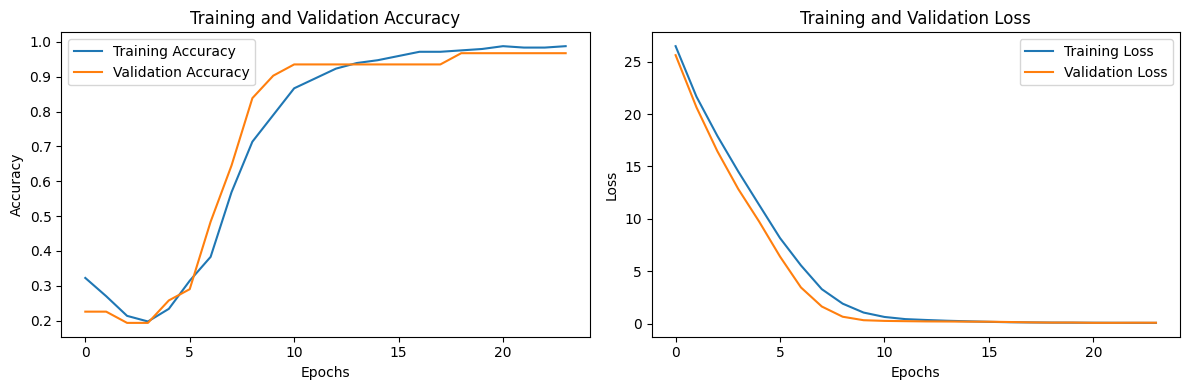

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist3.history['accuracy'], label='Training Accuracy')
plt.plot(hist3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist3.history['loss'], label='Training Loss')
plt.plot(hist3.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss3, test_accuracy3 = mod3.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss3 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy3 * 100:.2f}%")

1/1 [==============================] - 0s 32ms/step - loss: 0.0023 - accuracy: 1.0000
Test Loss: 0.23%
Test Accuracy: 100.00%


### Fourth Modification
---

In [ ]:
mod4 = Sequential()
mod4.add(Dense(64, input_shape = (x_train.shape[1], ), activation='tanh'))
mod4.add(Dense(32, activation='tanh'))
mod4.add(Dense(16, activation='tanh'))
mod4.add(Dense(3, activation='softmax'))

mod4.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

hist4 = mod4.fit(x_train, y_train,
                 epochs = 50,
                 batch_size = 32,
                 validation_data = (x_val, y_val),
                 callbacks = callbacks)

Epoch 1/50
1/8 [==>...........................] - ETA: 6s - loss: 1.5369 - accuracy: 0.3750
Epoch 1: val_loss did not improve from 0.00162
8/8 [==============================] - 1s 36ms/step - loss: 1.1942 - accuracy: 0.3306 - val_loss: 0.7771 - val_accuracy: 0.8387 - lr: 0.0010
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 0.8146 - accuracy: 0.6250
Epoch 2: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 10ms/step - loss: 0.6172 - accuracy: 0.8185 - val_loss: 0.4614 - val_accuracy: 0.9355 - lr: 0.0010
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 0.4778 - accuracy: 0.9375
Epoch 3: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 11ms/step - loss: 0.4069 - accuracy: 0.9073 - val_loss: 0.3314 - val_accuracy: 0.9677 - lr: 0.0010
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.8750
Epoch 4: val_loss did not improve from 0.00162
8/8 [================

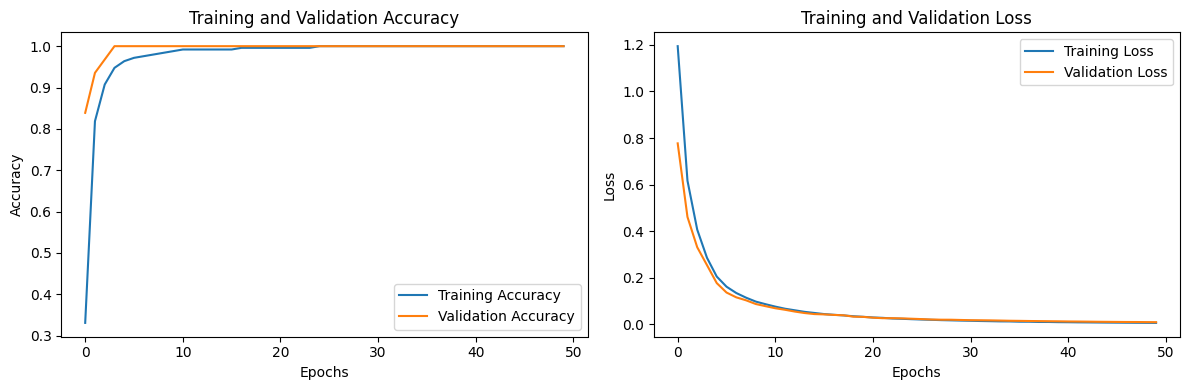

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist4.history['accuracy'], label='Training Accuracy')
plt.plot(hist4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist4.history['loss'], label='Training Loss')
plt.plot(hist4.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss4, test_accuracy4 = mod4.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss4 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy4 * 100:.2f}%")

1/1 [==============================] - 0s 34ms/step - loss: 0.0185 - accuracy: 1.0000
Test Loss: 1.85%
Test Accuracy: 100.00%


### Fifth Modification
---


In [ ]:
mod5 = Sequential()
mod5.add(Dense(6, kernel_initializer='uniform', activation='relu', input_shape = (x_train.shape[1], )))
mod5.add(Dense(6, kernel_initializer='uniform',activation='relu'))
mod5.add(Dense(2, kernel_initializer='uniform',activation='sigmoid'))

mod5.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

hist5 = mod5.fit(x_train, y_train,
                 epochs = 50,
                 batch_size = 32,
                 validation_data = (x_val, y_val),
                 callbacks = callbacks)

Epoch 1/50
1/8 [==>...........................] - ETA: 5s - loss: 0.6935 - accuracy: 0.3750
Epoch 1: val_loss did not improve from 0.00162
8/8 [==============================] - 1s 36ms/step - loss: 0.6918 - accuracy: 0.6250 - val_loss: 0.6896 - val_accuracy: 0.6452 - lr: 0.0010
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 0.6883 - accuracy: 0.7188
Epoch 2: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 10ms/step - loss: 0.6863 - accuracy: 0.6734 - val_loss: 0.6824 - val_accuracy: 0.6452 - lr: 0.0010
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 0.6788 - accuracy: 0.7188
Epoch 3: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 13ms/step - loss: 0.6750 - accuracy: 0.6734 - val_loss: 0.6656 - val_accuracy: 0.6452 - lr: 0.0010
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 0.6584 - accuracy: 0.7188
Epoch 4: val_loss did not improve from 0.00162
8/8 [================

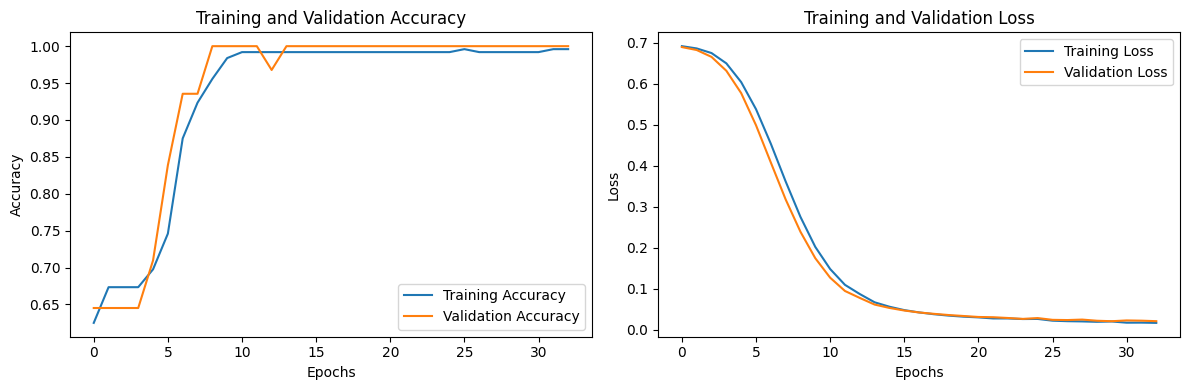

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist5.history['accuracy'], label='Training Accuracy')
plt.plot(hist5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist5.history['loss'], label='Training Loss')
plt.plot(hist5.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss5, test_accuracy5 = mod5.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss5 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy5 * 100:.2f}%")

1/1 [==============================] - 0s 34ms/step - loss: 0.0287 - accuracy: 0.9677
Test Loss: 2.87%
Test Accuracy: 96.77%


### Sixth Modification

In [ ]:
from tensorflow.keras.constraints import MaxNorm

mod6 = Sequential()
mod6.add(Dense(60, kernel_constraint = MaxNorm(3), activation='relu', input_shape = (x_train.shape[1], )))
mod6.add(Dropout(0.2))
mod6.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
mod6.add(Dropout(0.2))
mod6.add(Dense(2, activation='sigmoid'))

mod6.compile(optimizer = 'sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

hist6 = mod6.fit(x_train, y_train,
                 epochs = 50,
                 batch_size = 32,
                 validation_data = (x_val, y_val),
                 callbacks = callbacks)

Epoch 1/50
1/8 [==>...........................] - ETA: 3s - loss: 17.9217 - accuracy: 0.4062
Epoch 1: val_loss did not improve from 0.00162
8/8 [==============================] - 1s 34ms/step - loss: 18.5089 - accuracy: 0.5202 - val_loss: 0.4350 - val_accuracy: 0.6452 - lr: 0.0100
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 0.5150 - accuracy: 0.6250
Epoch 2: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 9ms/step - loss: 0.4546 - accuracy: 0.6694 - val_loss: 0.3727 - val_accuracy: 0.6452 - lr: 0.0100
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 0.4002 - accuracy: 0.6562
Epoch 3: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 11ms/step - loss: 0.4016 - accuracy: 0.7016 - val_loss: 0.2816 - val_accuracy: 0.7419 - lr: 0.0100
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.8125
Epoch 4: val_loss did not improve from 0.00162
8/8 [===============

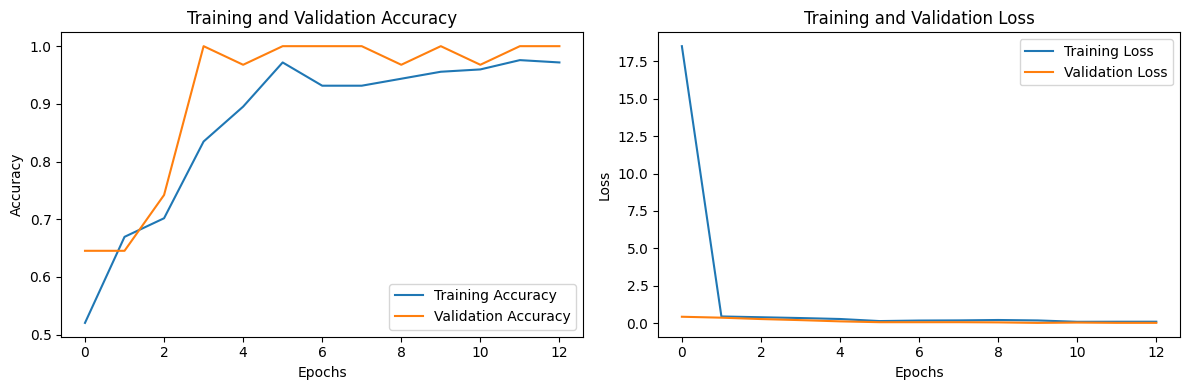

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist6.history['accuracy'], label='Training Accuracy')
plt.plot(hist6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist6.history['loss'], label='Training Loss')
plt.plot(hist6.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss6, test_accuracy6 = mod6.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss6 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy6 * 100:.2f}%")

1/1 [==============================] - 0s 44ms/step - loss: 0.0501 - accuracy: 1.0000
Test Loss: 5.01%
Test Accuracy: 100.00%


### Seventh Modification

In [ ]:
mod7 = Sequential()
mod7.add(Dense(8, activation='relu', kernel_initializer = 'random_uniform', input_shape = (x_train.shape[1], )))
mod7.add(Dense(8, activation='relu', kernel_initializer = 'random_uniform'))
mod7.add(Dense(8, activation='sigmoid', kernel_initializer = 'random_uniform'))

mod7.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

hist7 = mod7.fit(x_train, y_train,
                 epochs = 50,
                 batch_size = 32,
                 validation_data = (x_val, y_val),
                 callbacks = callbacks)

Epoch 1/50
1/8 [==>...........................] - ETA: 7s - loss: 2.0615 - accuracy: 0.4688
Epoch 1: val_loss did not improve from 0.00162
8/8 [==============================] - 1s 52ms/step - loss: 2.0413 - accuracy: 0.3266 - val_loss: 2.0033 - val_accuracy: 0.3548 - lr: 0.0010
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2.0126 - accuracy: 0.1875
Epoch 2: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 10ms/step - loss: 1.9532 - accuracy: 0.3266 - val_loss: 1.8753 - val_accuracy: 0.3548 - lr: 0.0010
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 1.8780 - accuracy: 0.2500
Epoch 3: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 15ms/step - loss: 1.7651 - accuracy: 0.3266 - val_loss: 1.6182 - val_accuracy: 0.3548 - lr: 0.0010
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 1.6058 - accuracy: 0.2812
Epoch 4: val_loss did not improve from 0.00162
8/8 [================

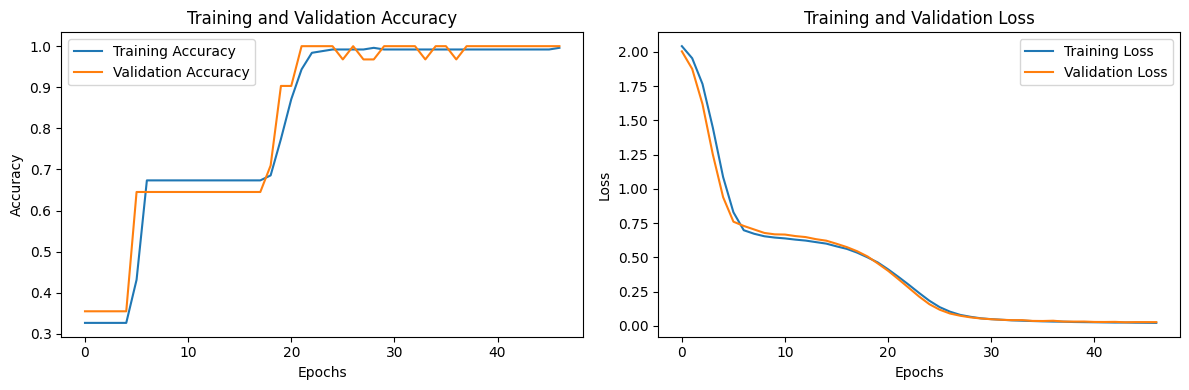

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist7.history['accuracy'], label='Training Accuracy')
plt.plot(hist7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist7.history['loss'], label='Training Loss')
plt.plot(hist7.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss7, test_accuracy7 = mod7.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss7 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy7 * 100:.2f}%")

1/1 [==============================] - 0s 34ms/step - loss: 0.0351 - accuracy: 0.9677
Test Loss: 3.51%
Test Accuracy: 96.77%


### Eighth Modification

In [ ]:
mod8 = Sequential()
mod8.add(Dense(8, activation='sigmoid', input_shape = (x_train.shape[1], )))
mod8.add(Dense(6, activation='sigmoid'))
mod8.add(Dense(6, activation='sigmoid'))
mod8.add(Dense(4, activation='sigmoid'))
mod8.add(Dense(2, activation='sigmoid'))

mod8.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

hist8 = mod8.fit(x_train, y_train,
                 epochs = 50,
                 batch_size = 32,
                 validation_data = (x_val, y_val),
                 callbacks = callbacks)

Epoch 1/50
1/8 [==>...........................] - ETA: 10s - loss: 0.8392 - accuracy: 0.3438
Epoch 1: val_loss did not improve from 0.00162
8/8 [==============================] - 2s 55ms/step - loss: 0.8401 - accuracy: 0.3266 - val_loss: 0.8118 - val_accuracy: 0.3548 - lr: 0.0010
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 0.8008 - accuracy: 0.3750
Epoch 2: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 12ms/step - loss: 0.8184 - accuracy: 0.3266 - val_loss: 0.7931 - val_accuracy: 0.3548 - lr: 0.0010
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 0.7831 - accuracy: 0.3750
Epoch 3: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 15ms/step - loss: 0.7989 - accuracy: 0.3266 - val_loss: 0.7759 - val_accuracy: 0.3548 - lr: 0.0010
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 0.7936 - accuracy: 0.3125
Epoch 4: val_loss did not improve from 0.00162
8/8 [===============

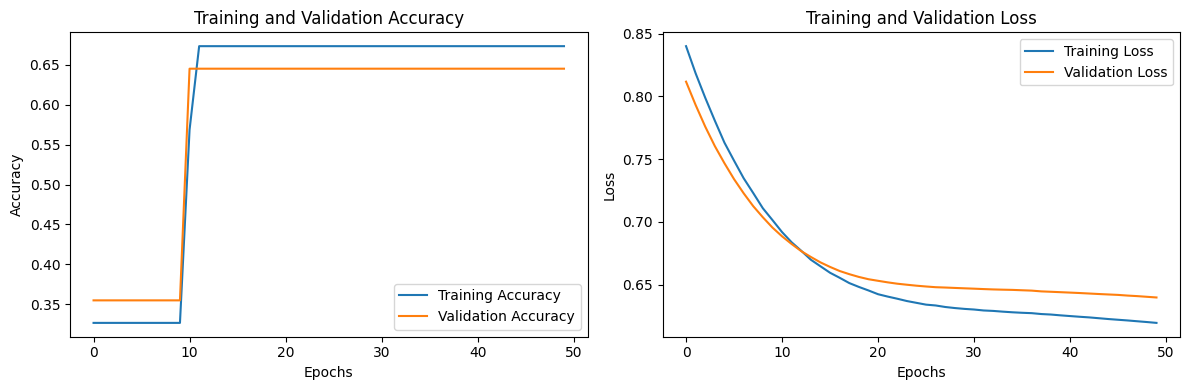

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist8.history['accuracy'], label='Training Accuracy')
plt.plot(hist8.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist8.history['loss'], label='Training Loss')
plt.plot(hist8.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss8, test_accuracy8 = mod8.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss8 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy8 * 100:.2f}%")

1/1 [==============================] - 0s 31ms/step - loss: 0.5704 - accuracy: 0.7419
Test Loss: 57.04%
Test Accuracy: 74.19%


### Ninth Modification

In [ ]:
mod9 = Sequential()
mod9.add(Dense(256, activation='relu', input_shape = (x_train.shape[1], )))

mod9.add(BatchNormalization())
mod9.add(Dropout(0.2))
mod9.add(Dense(256, activation='relu'))

mod9.add(BatchNormalization())
mod9.add(Dropout(0.2))
mod9.add(Dense(256, activation='relu'))

mod9.add(BatchNormalization())
mod9.add(Dropout(0.2))
mod9.add(Dense(2, activation='sigmoid'))

mod9.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

hist9 = mod9.fit(x_train, y_train,
                 epochs = 50,
                 batch_size = 32,
                 validation_data = (x_val, y_val),
                 callbacks = callbacks)

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 0.3320 - accuracy: 0.8884 
Epoch 1: val_loss did not improve from 0.00162
8/8 [==============================] - 2s 54ms/step - loss: 0.3021 - accuracy: 0.8992 - val_loss: 8.6950 - val_accuracy: 0.3548 - lr: 0.0010
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 0.0585 - accuracy: 0.9839
Epoch 2: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 13ms/step - loss: 0.0585 - accuracy: 0.9839 - val_loss: 9.0926 - val_accuracy: 0.3548 - lr: 0.0010
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9960
Epoch 3: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 13ms/step - loss: 0.0157 - accuracy: 0.9960 - val_loss: 7.5055 - val_accuracy: 0.3548 - lr: 0.0010
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 0.0118 - accuracy: 1.0000
Epoch 4: val_loss did not improve from 0.00162
8/8 [===============

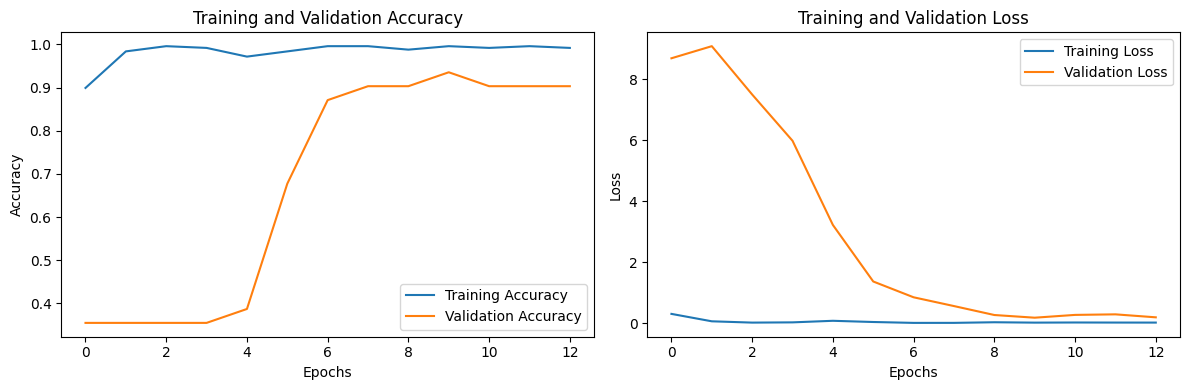

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist9.history['accuracy'], label='Training Accuracy')
plt.plot(hist9.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist9.history['loss'], label='Training Loss')
plt.plot(hist9.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss9, test_accuracy9 = mod9.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss9 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy9 * 100:.2f}%")

1/1 [==============================] - 0s 34ms/step - loss: 0.0525 - accuracy: 1.0000
Test Loss: 5.25%
Test Accuracy: 100.00%


### Tenth Modification

In [ ]:
mod10 = Sequential()
mod10.add(Dense(320, input_dim=x_train.shape[1], activation='relu'))
mod10.add(Dense(384, activation='relu'))
mod10.add(Dense(352, activation='relu'))
mod10.add(Dense(448, activation='relu'))
mod10.add(Dense(160, activation='relu'))
mod10.add(Dense(160, activation='relu'))
mod10.add(Dense(32, activation='relu'))
model.add(Dense(1))

mod10.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

hist10 = mod10.fit(x_train, y_train,
                 epochs = 50,
                 batch_size = 32,
                 validation_data = (x_val, y_val),
                 callbacks = callbacks)

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 2.6476 - accuracy: 0.3625    
Epoch 1: val_loss did not improve from 0.00162
8/8 [==============================] - 2s 52ms/step - loss: 2.5378 - accuracy: 0.4677 - val_loss: 2.1219 - val_accuracy: 0.6452 - lr: 1.0000e-04
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 1.9960 - accuracy: 0.6354
Epoch 2: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 21ms/step - loss: 1.9006 - accuracy: 0.6734 - val_loss: 1.5398 - val_accuracy: 0.6452 - lr: 1.0000e-04
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3798 - accuracy: 0.6875
Epoch 3: val_loss did not improve from 0.00162
8/8 [==============================] - 0s 23ms/step - loss: 1.4067 - accuracy: 0.6734 - val_loss: 1.0156 - val_accuracy: 0.6452 - lr: 1.0000e-04
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 0.9399 - accuracy: 0.6375
Epoch 4: val_loss did not improve from 0.00162
8/8 [

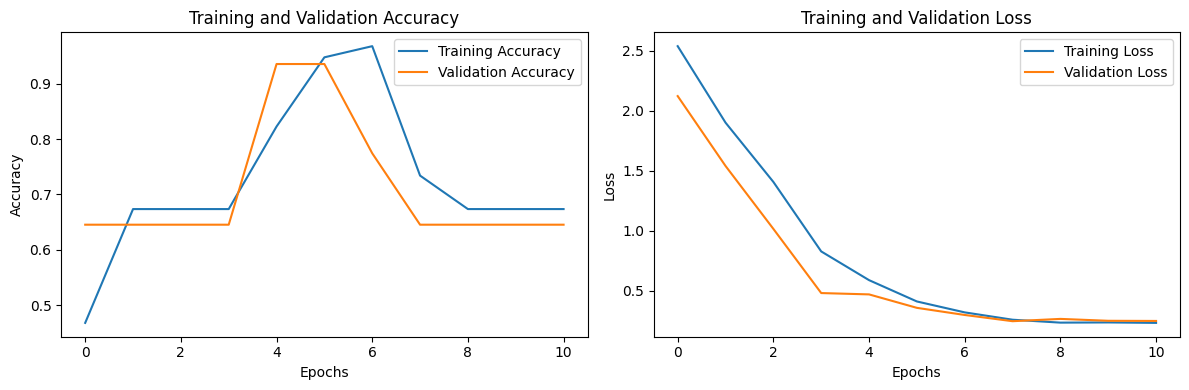

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(hist10.history['accuracy'], label='Training Accuracy')
plt.plot(hist10.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(hist10.history['loss'], label='Training Loss')
plt.plot(hist10.history  ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss10, test_accuracy10 = mod10.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss10 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy10 * 100:.2f}%")

1/1 [==============================] - 0s 30ms/step - loss: 0.1921 - accuracy: 0.7419
Test Loss: 19.21%
Test Accuracy: 74.19%


After 10 times modification of the architecture, the overall best modification is the fifth modification with test accuracy around 97%, but the loss is only around 3%.

Both graphs also shows that this architecure model is a good fit for making predictions.

# e. Architecture Evaluation

References:
1. https://medium.com/@polanitzer/building-a-convolutional-neural-network-in-python-predict-digits-from-gray-scale-images-of-550d79b358b
2. https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397
3. https://williamking112.medium.com/classification-report-explained-38aa21767b3f

In [ ]:
from sklearn.metrics import classification_report

### Benchmark model
---

In [ ]:
pred1 = model.predict(x_test)
pred1 = np.argmax(pred1, axis=1)
print(classification_report(y_test, pred1))

1/1 [==============================] - 0s 25ms/step
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.70      0.88      0.78         8

    accuracy                           0.87        31
   macro avg       0.83      0.87      0.84        31
weighted avg       0.89      0.87      0.88        31



Accuracy:
* The overall accuracy of the model is 87% which means that the model prediction is correct around 87%.

Precision:
* Out of all patient that the model predicted has a lower back pain, 95% of them actually did.
* Out of all patient that the model predicted does not have a lower back pain, 70% of them actually did.

Recall:
* Out of all patient that actually have a lower back pain, the model predicted it correctly for 87% of them.
* Out of all patient that actually does not have a lower back pain, the model predicted it correctly for 88% of them.

F1-Score:
<br>
Both F1-Score values are close to 1, this means that the model does a good job of predicting if someone has a lower back pain or not.
<br>
The model is better at predicting if someone has a lower back pain than not, since the F1-score for the 'Abnormal' is higher.


### Modified model
---

In [ ]:
pred2 = mod5.predict(x_test)
pred2 = np.argmax(pred2, axis=1)
print(classification_report(y_test, pred2))

1/1 [==============================] - 0s 63ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.88      0.93         8

    accuracy                           0.97        31
   macro avg       0.98      0.94      0.96        31
weighted avg       0.97      0.97      0.97        31



Accuracy:
* The overall accuracy of the model is 97% which means that the model prediction is correct around 97%.

Precision:
* Out of all patient that the model predicted has a lower back pain, 96% of them actually did.
* Out of all patient that the model predicted does not have a lower back pain, all (100%) of them actually did.

Recall:
* Out of all patient that actually have a lower back pain, the model predicted it correctly for all (100%) of them.
* Out of all patient that actually does not have a lower back pain, the model predicted it correctly for 88% of them.

F1-Score:
<br>
Both F1-Score values are close to 1, this means that the model does a good job of predicting if someone has a lower back pain or not.
<br>
The model is better at predicting if someone has a lower back pain than not, since the F1-score for the 'Abnormal' is higher.
